In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.applications import VGG16,ResNet50V2
import numpy as np
from tqdm import tqdm

In [2]:
resnet = ResNet50V2()
new_md = tf.keras.models.Model(inputs = resnet.inputs , outputs=  [ o.output for o in resnet.layers if "conv" in o.name])

resize_image = lambda path: cv2.resize(cv2.imread(path),(224,224)).reshape((1,224,224,3))
img = resize_image("cat1.jpg")

outs = new_md.predict(img)

In [7]:
(1,*resnet.input_shape[1:])

(1, 224, 224, 3)

In [3]:

def getFeatureMap(outs,top_k_layers = 1):

    for i in tqdm(range(top_k_layers),desc="Saving feature map ",ncols=100):
        t = outs[i][0]
        sq = int(np.sqrt(t.shape[-1]))
        plt.figure(figsize=(20,20))

        for j in range(sq*sq):
            plt.subplot(sq,sq,j+1)
            plt.imshow(t[:,:,j])
            plt.axis("off")
        output_layername = new_md.outputs[i].name.replace("/","_").replace(":","_")
        plt.savefig(f"./resnet/vgg_{output_layername}.png")

Saving feature map : 100%|████████████████████████████████████████████| 5/5 [00:10<00:00,  2.15s/it]


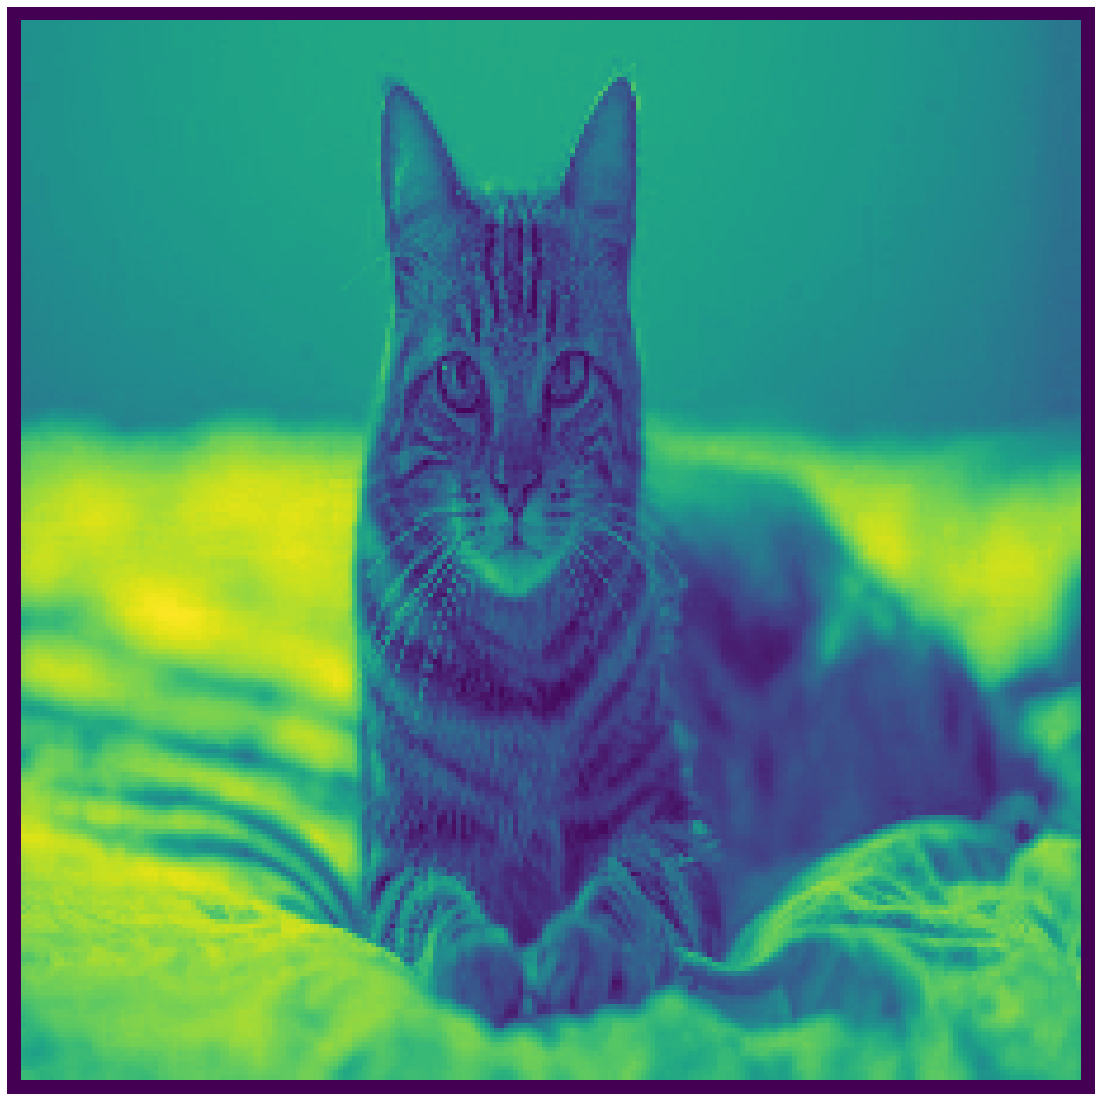

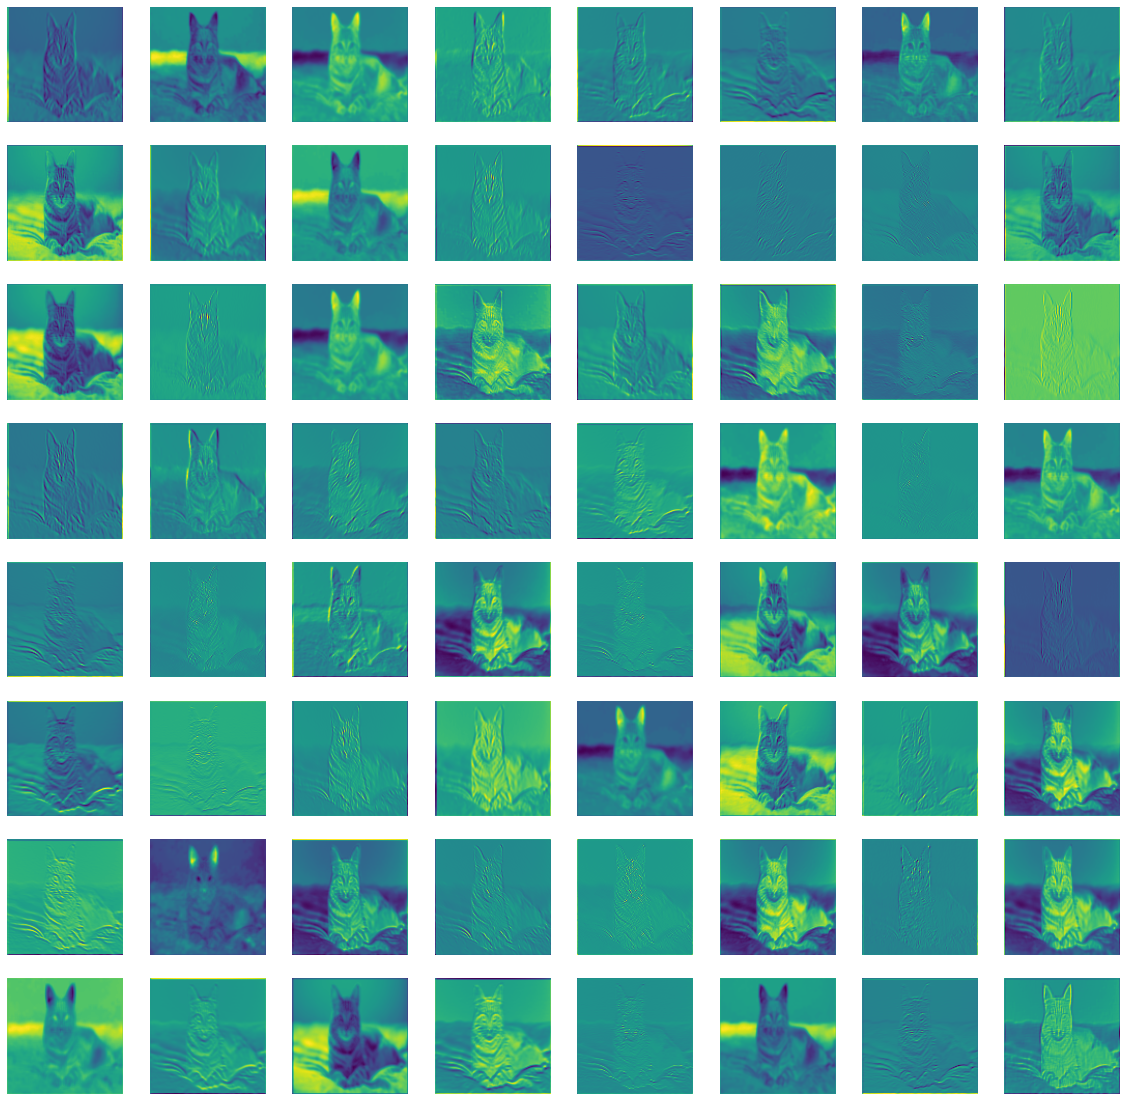

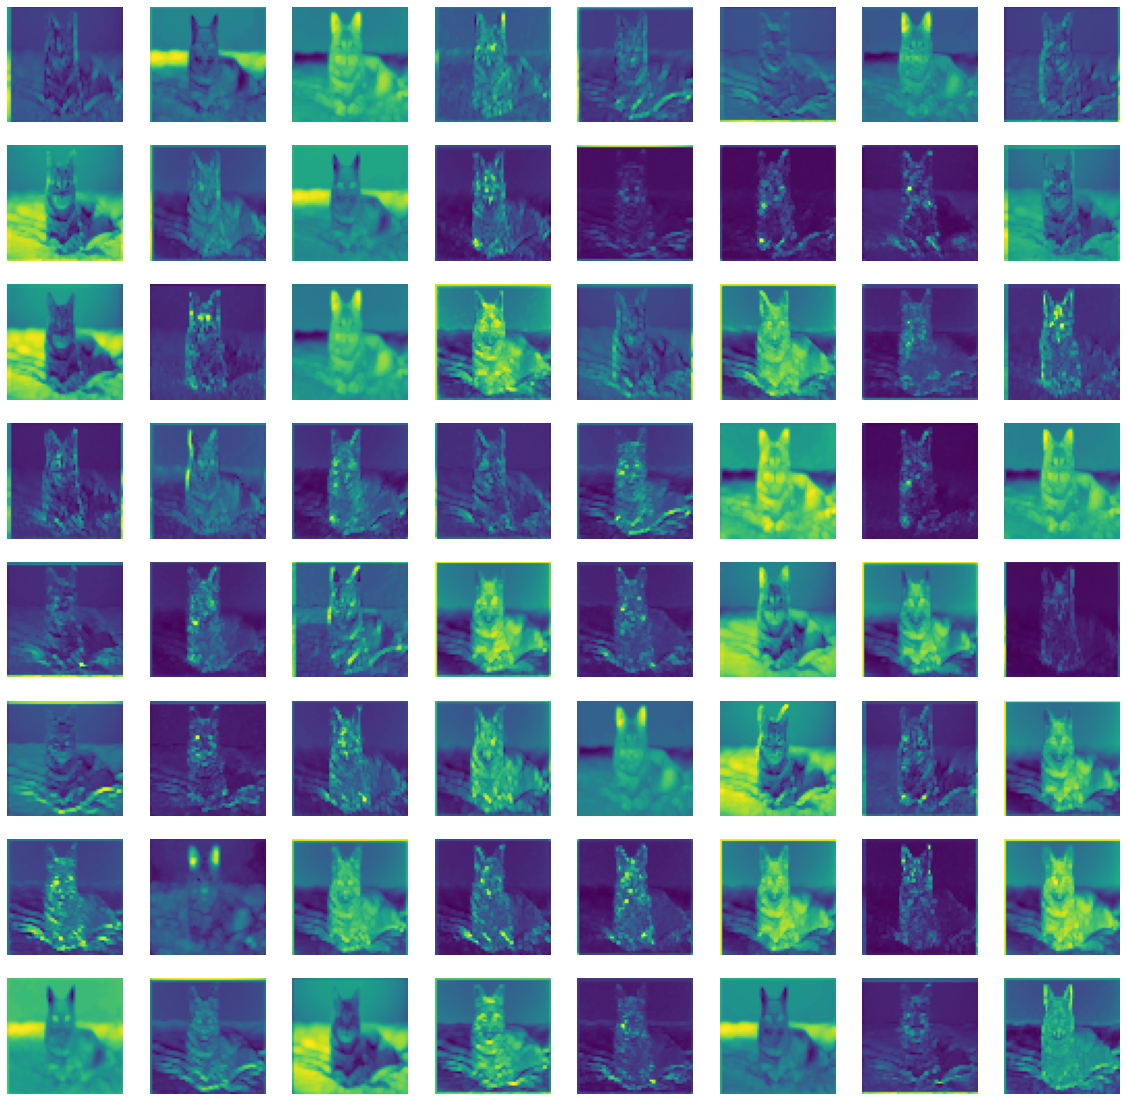

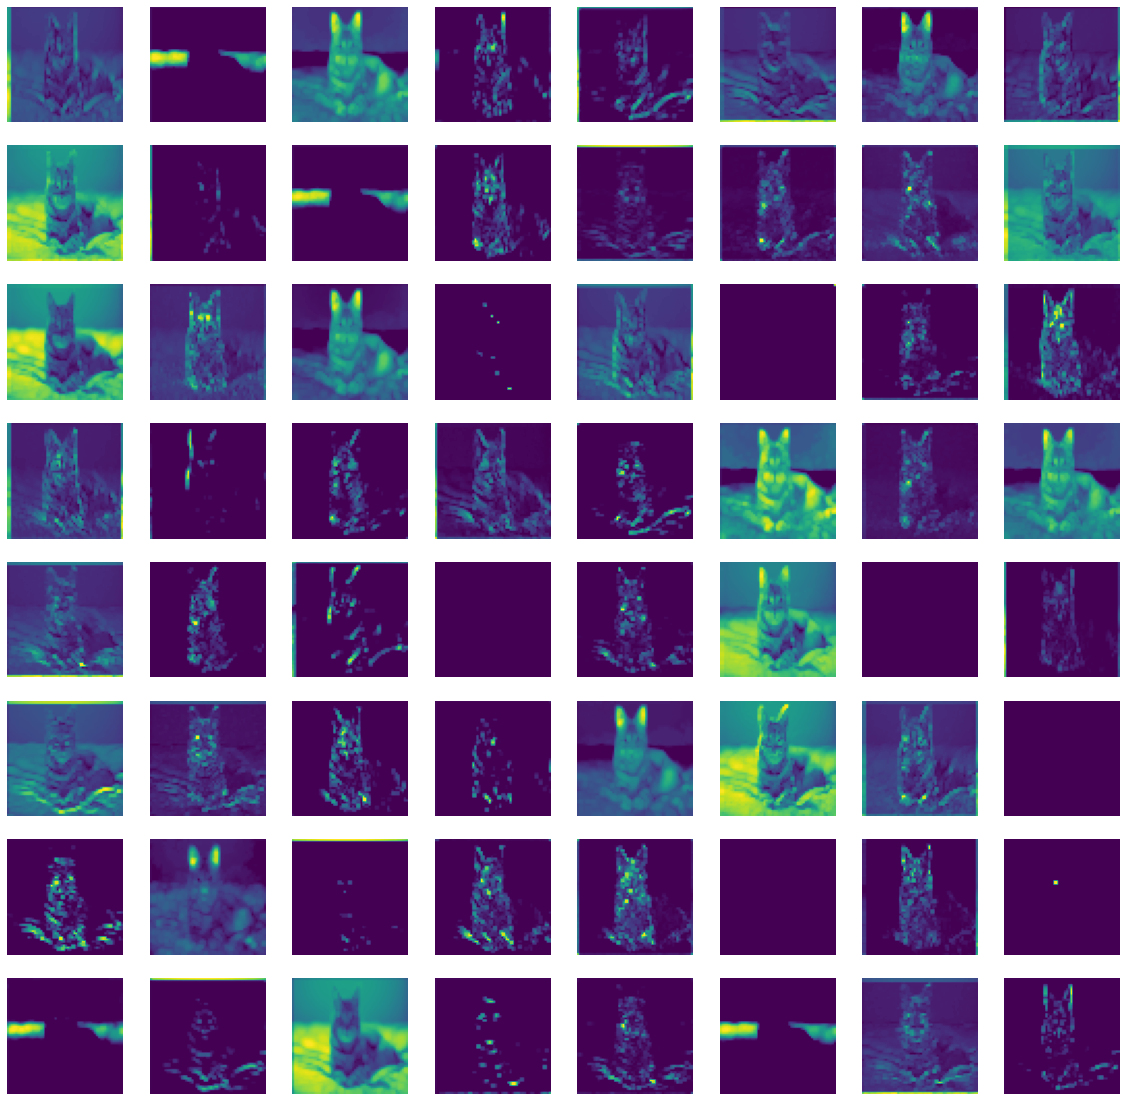

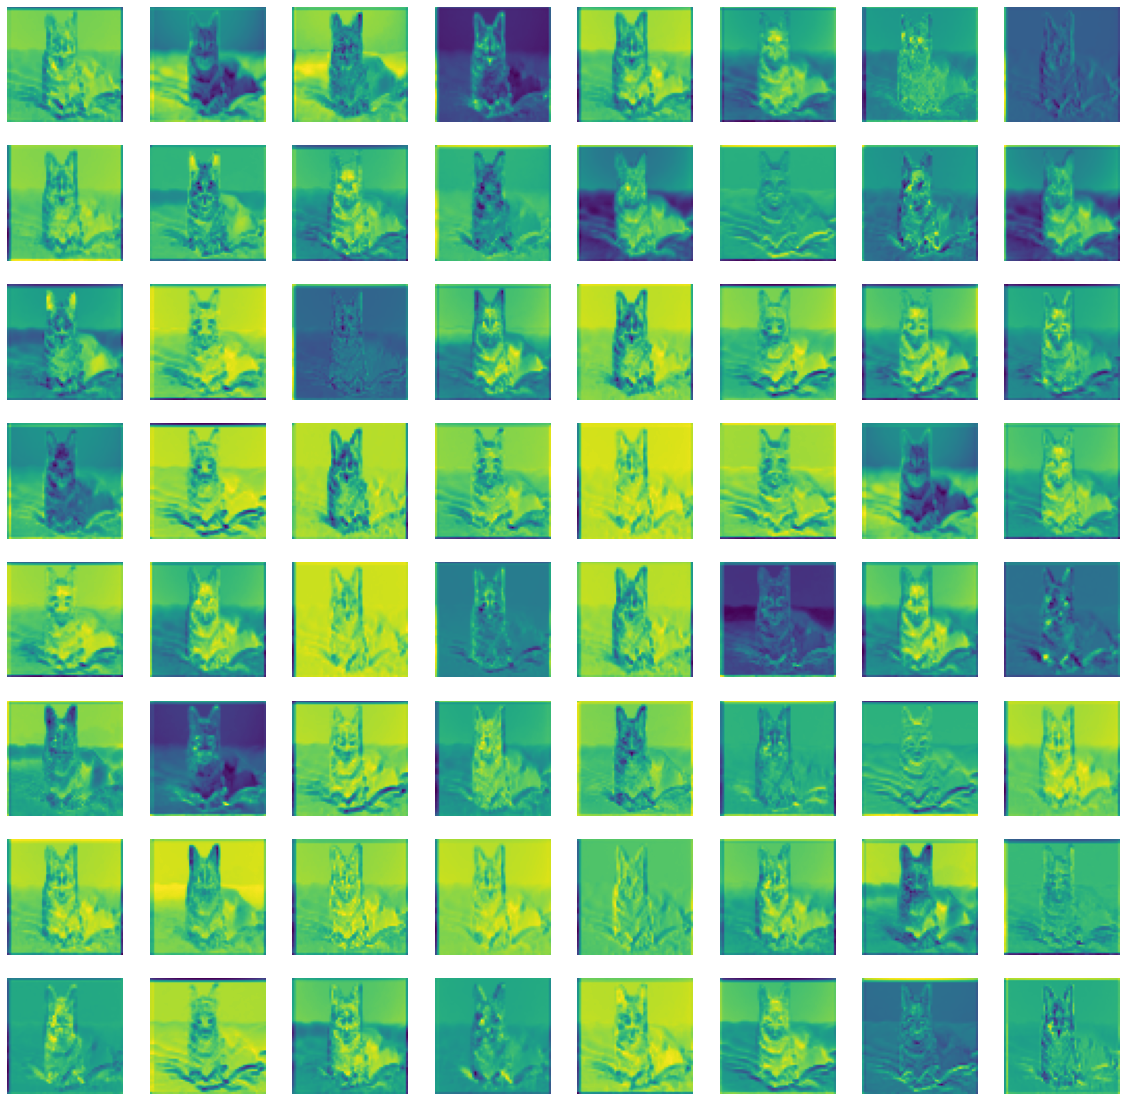

In [4]:
getFeatureMap(outs,top_k_layers=5)